# Lesson 10: seaborn, plotnie

최규빈  
2023-07-26

<a href="https://colab.research.google.com/github/guebin/PP2024WIN/blob/main/posts/Day2/ls10.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [14]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120

In [15]:
# import warnings
# warnings.filterwarnings('ignore')

# Seaborn

`-` 개념차이

-   matplotlib: 벡터 친화적
-   seaborn: 데이터프레임 친화적

`-` 데이터프레임 친화적인 시각화 툴이 왜 강력한가?

-   분석할 데이터가 tabula data 형식인 경우가 많다.
-   matplotlib은 여전히 강력하지만, seaborn등 데이터프레임 친화적
    패키지가 우수한 경우가 많다.

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")

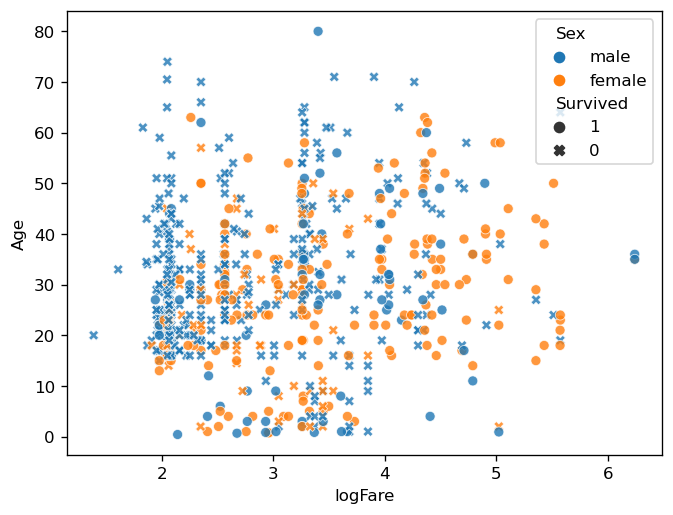

In [17]:
sns.scatterplot(
    df,
    x='logFare',
    y='Age',
    hue='Sex',
    style='Survived',style_order=[1,0],
    alpha=0.8
)

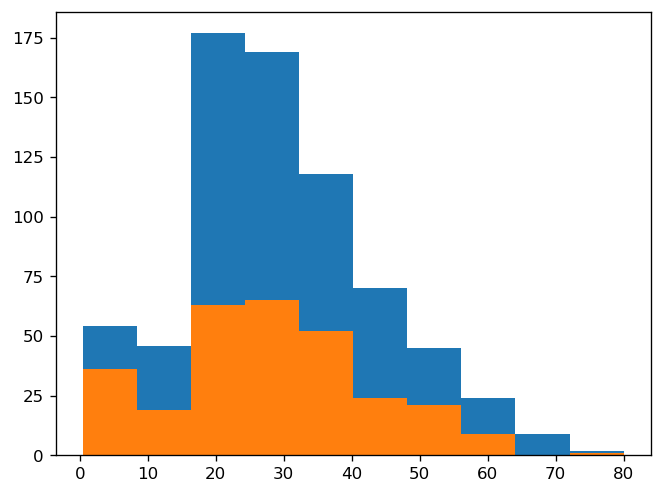

In [18]:
plt.hist(df.Age);
plt.hist(df.Age[df.Survived==1]);

# 훌륭한 시각화

## 애드워드 터프티

`-` 데이터 시각화계의 거장

`-` 터프티의 이론중 백미: 엄격한 미니멀리즘

-   최소한의 잉크로 많은 정보를 전달할 수 있다면 그것이 바로 좋은
    그래프이다.
-   작은 지면 내에서 잉크를 최대한 적게 써서 짧은 시간 안에 많은 영감을
    주어야 한다.

`-` 데이터-잉크비: 데이터를 표현하는데 들아가는 잉크의 양 / 그래픽을
인쇄하는데 들어가는 잉크의 총량

`-` 차트정크 (나이젤홈즈의 그래프)

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-06-fig1.jpeg?raw=true "그림1: <타임>에 수록된 나이젤홈즈의 작품")

> “Lurking behind chartjunk is contempt both for information and for the
> audience. Chartjunk promoters imagine that numbers and details are
> boring, dull, and tedious, requiring ornament to enliven. Cosmetic
> decoration, which frequently distorts the data, will never salvage an
> underlying lack of content. If the numbers are boring, then you’ve got
> the wrong numbers (…) Worse is contempt for our audience, designing as
> if readers were obtuse and uncaring. In fact, consumers of graphics
> are often more intelligent about the information at hand than those
> who fabricate the data decoration (…) The operating moral premise of
> information design should be that our readers are alert and caring;
> they may be busy, eager to get on with it, but they are not stupid.”

-   차트정크 = 대중을 멸시 + 데이터에 대한 모독
-   차트정크 옹호가는 숫자와 데이터가 지루하여 활기가 필요하다고
    생각하는 모양이다..

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig2.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig3.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig4.jpeg?raw=true)

`-` 제 생각: 글쎄…

## 찰스미나드의 도표

-   인류역사상 가장 훌륭한 시각화

![](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

`-` 터프티의 평

-   지금까지 그려진 최고의 통계 그래픽일지도 모른다.
-   여기에서는 군대의 크기, 2차원 평면상의 위치, 군대의 이동방향,
    모스코바에서 퇴각하는 동안의 여러날짜, 온도 $\to$ 6차원의 변수
-   백만번에 한번 이런 그림을 그릴수는 있겠지만 이러한 멋진 그래픽을
    만드는 방법에 대한 원칙은 없다. $\to$ 미니멀리즘..

`-` 왜 우수한 그래프일까?

-   자료를 파악하는 기법은 최근까지도 산점도, 막대그래프, 라인플랏에
    의존
-   이러한 플랏의 단점은 고차원의 자료를 분석하기 어렵다는 것임
-   미나드는 여러그림을 그리는 방법 대신에 한 그림에서 패널을 늘리는
    방법을 선택함.

# Plotnine

아래는 FIFA22의 자료를 불러오는 코드이다.

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.head()

포지션별로 선수들의 능력치(`ShotPower`,`SlidingTackle`)와 급여(`Wage`)를
시각화하고 싶다. 아래의 세부지침에 맞추어 포지션별 `ShotPower`와
`SlidingTackle`의 산점도를 그려라.

In [10]:
df.Position

***세부지침***

**A**. Column의 이름에서 공백을 제거하라.

**B**. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에
`.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.

**C**. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라.
변환된 값을 `df.Position`에 저장하라.

In [11]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

**D**. `df.Wage`를 적절하게 변환하라.

**E**. `Position==“DEFENDER”` or `Position==“FORWARD”`에 해당하는
관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라.
이때 `Position`은 color로 구분하고 `Wage`는 size와 alpha로 구분하라.

— 시각화예시 —

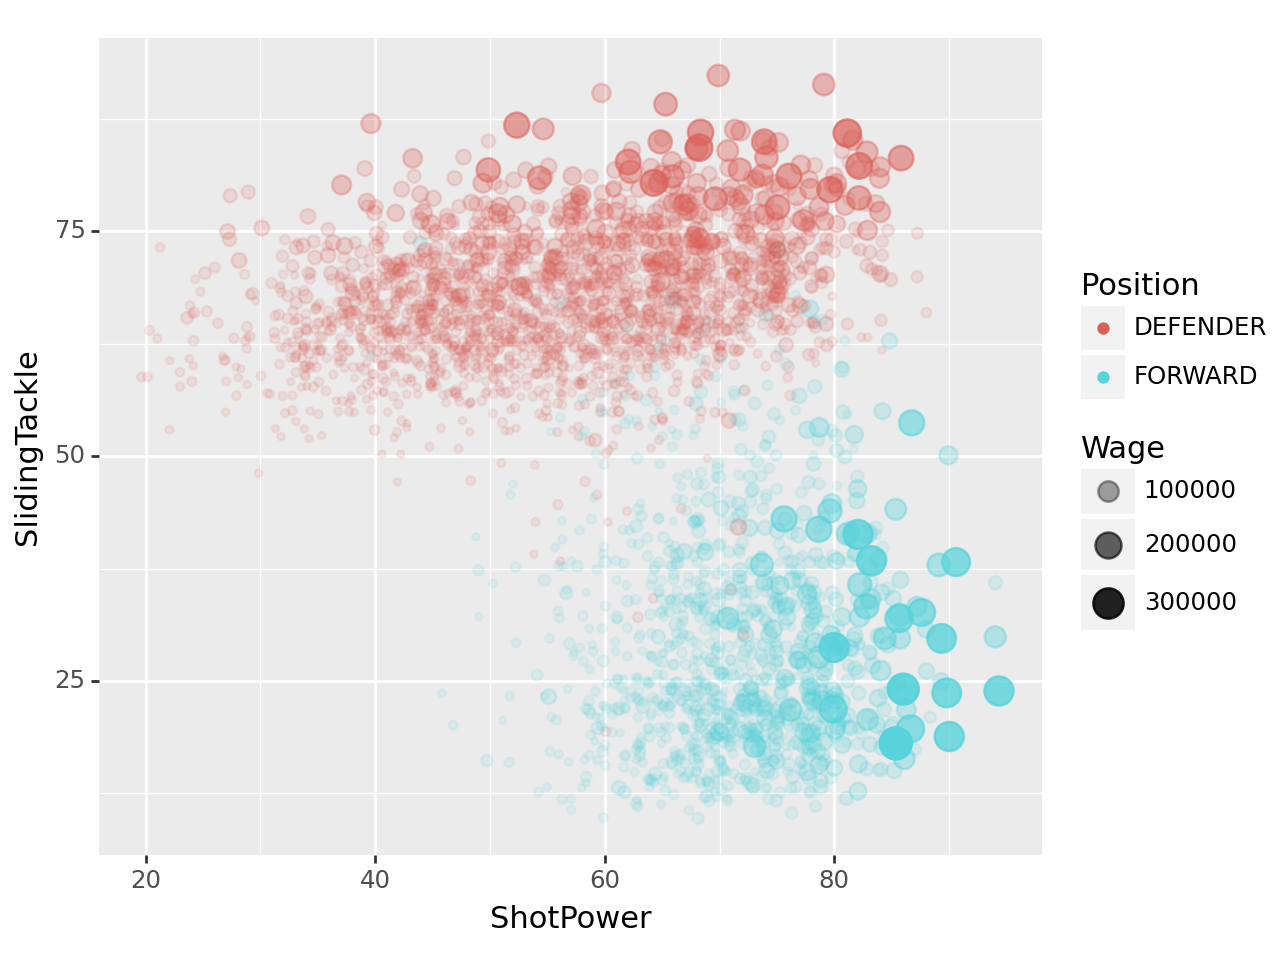

In [18]:
#

## A. 열의 이름에서 공백제거

In [56]:
df.columns = df.columns.str.replace(' ','')

## B. 결측치제거

In [13]:
df = df.loc[:,df.isna().mean()<0.5] # 결측치가 50퍼 이상인 컬럼을 제거

In [14]:
df = df.dropna()

In [15]:
df

## C. Position 칼럼의 변환

In [16]:
df['Position'] = df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0])

## D. Wage 칼럼의 변환

In [17]:
df['Wage'] = df.Wage.str[1:].str.replace('K','000').astype(int)

## E. 시각화

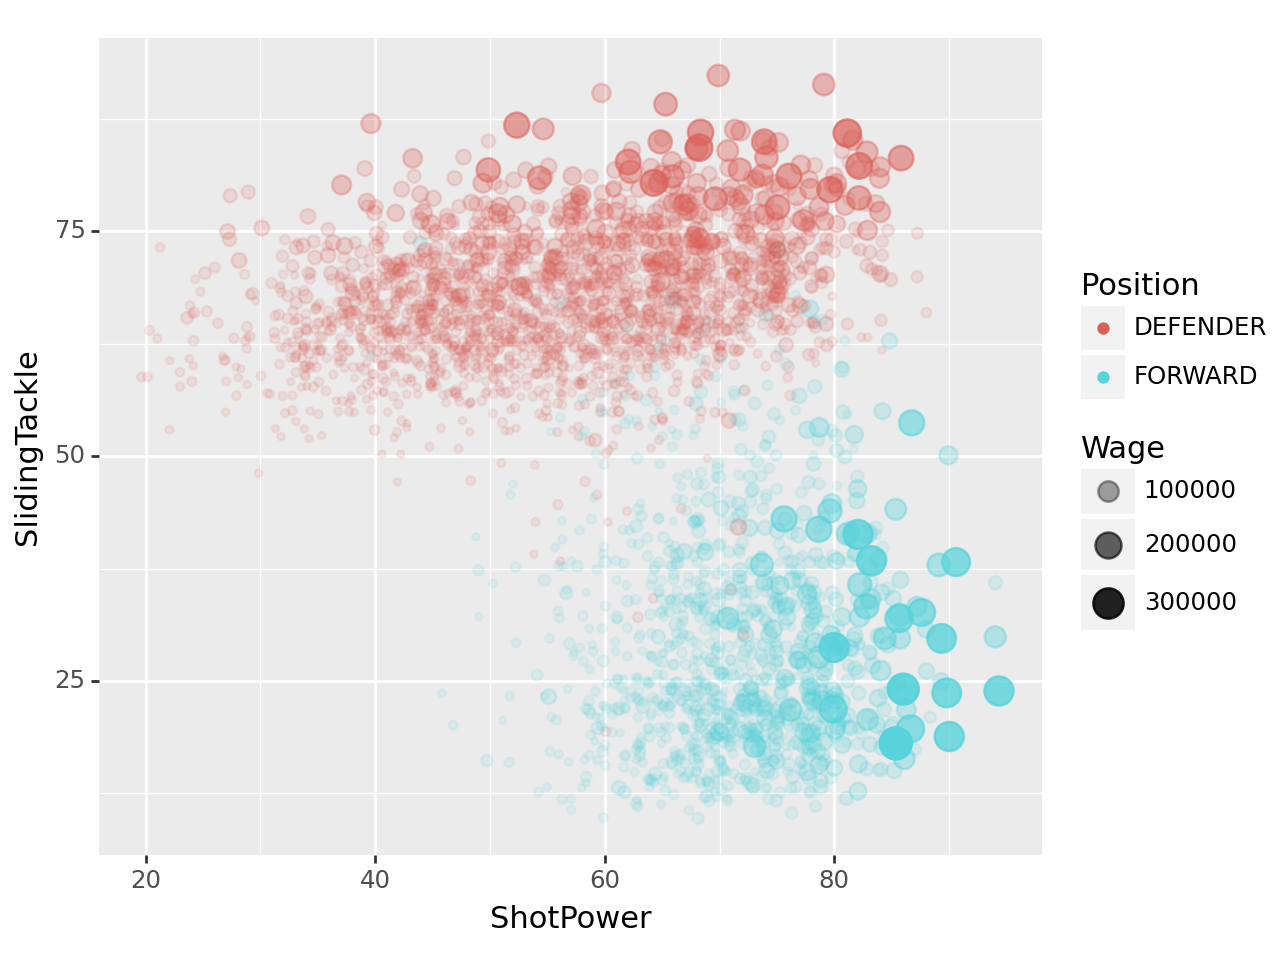

In [18]:
fig = ggplot(df.query('Position=="DEFENDER" or Position=="FORWARD"'))
point = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'),position='jitter')
fig + point